In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
import time
import itertools

### Modified dataset + Isolation Forest

In [3]:
df_data_scaled = pd.read_csv('/kaggle/input/dataset11/data_scaled.csv')
df_data_scaled.describe()

df_class = df_data_scaled['Class']

df_att = df_data_scaled.drop(['Class'], axis = 1)

df_att.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [22]:
df_class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X = df_att
y = df_class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
df_data_scaled[df_data_scaled['Class'] == 1].head(10)

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
541,-0.307413,-0.990214,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1
623,7.084469,-0.989438,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1
4920,3.045204,-0.942563,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1
6108,0.517013,-0.912910,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1
6329,-0.293440,-0.906648,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1
6331,-0.293440,-0.906566,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,...,0.488378,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1
6334,-0.293440,-0.906460,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,...,0.587743,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1
6336,-0.293440,-0.906366,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,...,0.269773,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1
6338,-0.293440,-0.906272,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,...,0.388307,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1
6427,-0.293440,-0.905579,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,...,0.504646,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1


In [8]:
# xy_train = pd.concat([X_train, y_train],axis = 1)
# xy_train[xy_train['Time'] == 472]

In [ ]:
from sklearn.ensemble import IsolationForest

isf = IsolationForest(random_state=42, n_estimators=100, max_samples = 256)
isf.fit(X_train)

results = pd.Series(isf.predict(X_train))

In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
results = pd.Series(isf.predict(X_train))
results_train = results.map({1:0, -1:1})
results_train.value_counts()

0    219980
1      7865
dtype: int64

[[0.9668588  0.0331412 ]
 [0.17005076 0.82994924]]


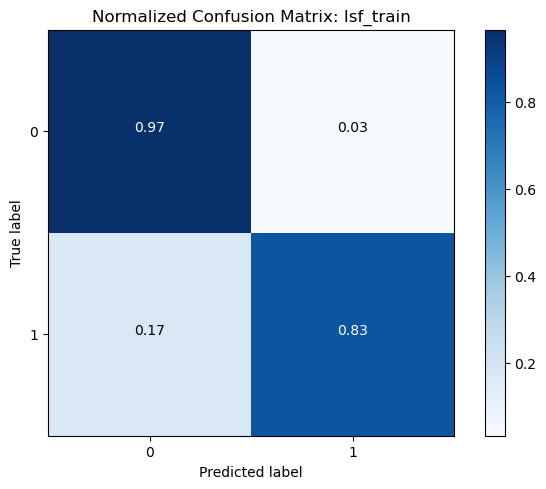

In [24]:
plot_confusion_matrix(confusion_matrix(y_train,results_train),classes=['0','1'], normalize = True, 
                      title='Normalized Confusion Matrix: Isf_train')

In [25]:
results = pd.Series(isf.predict(X_test))
results_test = results.map({1:0, -1:1})
results_test.value_counts()

0    54960
1     2002
dtype: int64

In [31]:
results.value_counts()

 1    54960
-1     2002
dtype: int64

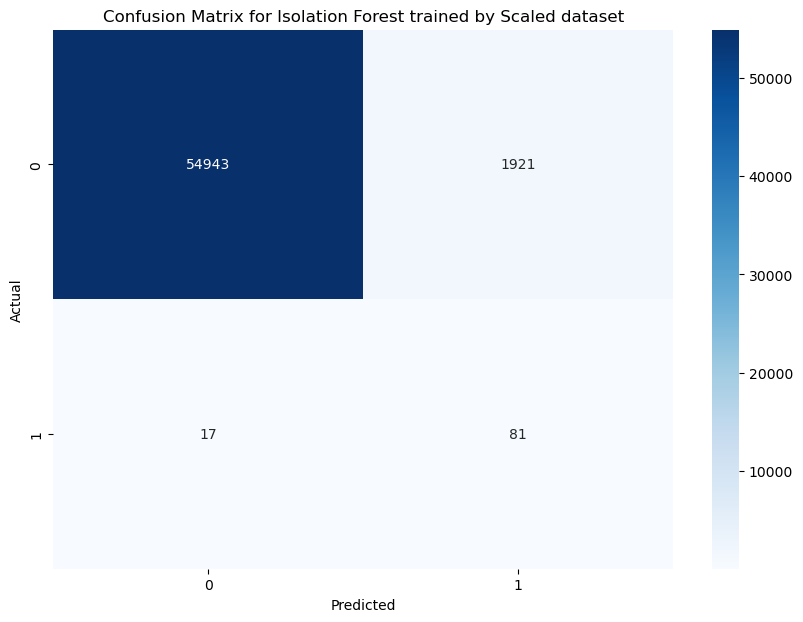

In [33]:
import seaborn as sns
# Compute the confusion matrix
cm = confusion_matrix(y_test, results_test)

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Isolation Forest trained by Scaled dataset')
plt.show()

### Original dataset + Isolation Forest

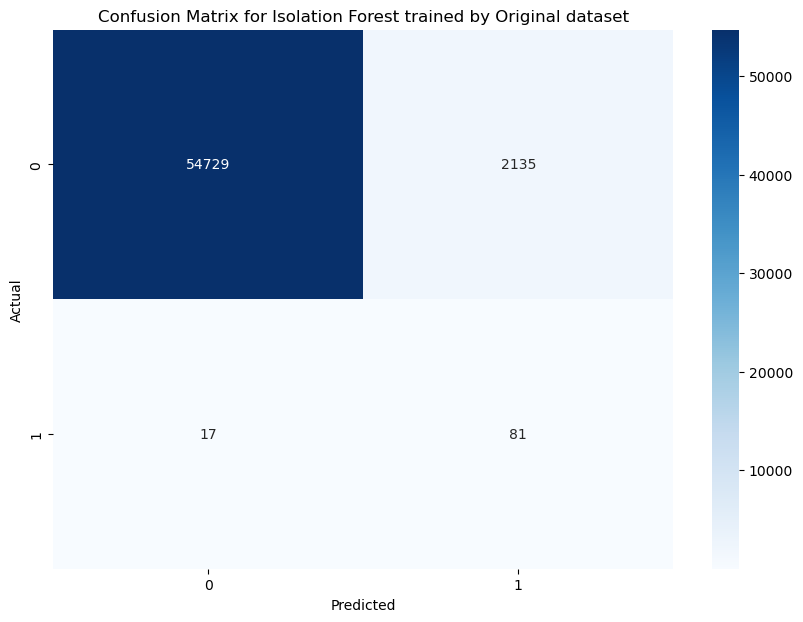

In [35]:
from sklearn.model_selection import train_test_split
df_data_original = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df_class = df_data_original['Class']

df_att = df_data_original.drop(['Class'], axis = 1)
# df_att = df_data_original
df_att.head()

X = df_att
y = df_class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df_data_scaled[df_data_scaled['Class'] == 1].head(10)

from sklearn.ensemble import IsolationForest
isf = IsolationForest(random_state=42)

isf.fit(X_train)

results = pd.Series(isf.predict(X_test))
results_test = results.map({1:0, -1:1})
results_test.value_counts()

import seaborn as sns
# Compute the confusion matrix
cm = confusion_matrix(y_test, results_test)

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Isolation Forest trained by Original dataset')
plt.show()

## Local outlier factor

In [4]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
df_data_scaled = pd.read_csv('/kaggle/input/dataset11/data_scaled.csv')

normal = df_data_scaled[df_data_scaled['Class'] == 0]
fraud = df_data_scaled[df_data_scaled['Class'] == 1]
normal_label = normal['Class']
fraud_label = fraud['Class']
normal = normal.drop(columns=['Class'])
fraud = fraud.drop(columns=['Class'])

df_data_scaled_label = df_data_scaled['Class']
df_data_scaled = df_data_scaled.drop(columns=['Class'])

df_test = pd.read_csv('/kaggle/input/dataset11/data_test.csv')
df_test_label = df_test['Class']
df_test = df_test.drop(columns=['Class'])


In [4]:
normal

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-0.296653,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731
284803,0.038986,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527
284804,0.641096,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561
284805,-0.167680,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533


In [8]:

lof = LocalOutlierFactor(n_neighbors=20, algorithm='auto', novelty=True, /
                         leaf_size=30, metric='minkowski', p=2, /
                         contamination=0.01, n_jobs=-1)

lof.fit(normal)

results = pd.Series(lof.predict(df_test))

# results = lof.fit(normal)
# results = pd.Series(results).map({1: 0, -1: 1})
# , contamination=0.00172
# print(type(results))

LocalOutlierFactor(contamination=0.002, n_jobs=-1, novelty=True)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


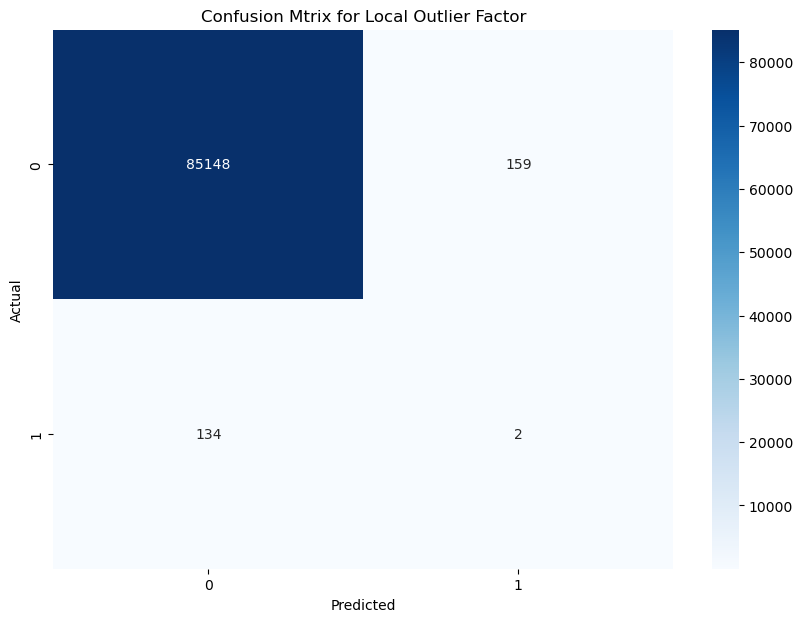

In [10]:
results = pd.Series(lof.predict(df_test))
results_test = results.map({1:0, -1:1})
results_test.value_counts()

import seaborn as sns
# Compute the confusion matrix
cm = confusion_matrix(df_test_label, results_test)

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Mtrix for Local Outlier Factor')
plt.show()

## Auto-encoder

In [5]:
from sklearn.model_selection import train_test_split
# the preprocess dataset
df_data = pd.read_csv('/kaggle/input/dataset11/data_scaled.csv')

# split fraud normal
df_fraud = df_data[df_data['Class'] == 1]
df_normal = df_data[df_data['Class'] == 0]

# train set and test set
df_train, df_test = train_test_split(df_normal, test_size=0.2, random_state=42)
# 20% validation test
df_train, df_validation = train_test_split(df_train, test_size=0.2, random_state=42)
# test set made of fraud and test set
df_test = pd.concat([df_fraud, df_test], ignore_index=True)

# df_train，df_validation，df_test
df_train = df_train.drop(['Class'], axis = 1)
df_validation = df_validation.drop(['Class'], axis = 1)
df_test_labels = df_test['Class']
df_test = df_test.drop(['Class'], axis = 1)

In [6]:
# len(df_test_labels)

In [7]:
import tensorflow as tf
# data dimensions // hyperparameters 
input_dim = df_train.shape[1]
BATCH_SIZE = 256
EPOCHS = 100   

autoencoder = tf.keras.models.Sequential([
    
    # deconstruct / encode
    tf.keras.layers.Dense(input_dim, activation='elu', input_shape=(input_dim, )), 
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(2, activation='elu'),
    
    # reconstruction / decode
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(input_dim, activation='elu')
    
])

# Key parameters 
autoencoder.compile(optimizer="adam", 
                    loss="mse",
                    metrics=["acc"])

# print an overview of our model
autoencoder.summary();

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 16)                496       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
 dense_5 (Dense)             (None, 4)                 12        
                                                                 
 dense_6 (Dense)             (None, 8)                 4

In [8]:
from datetime import datetime

# current date and time
yyyymmddHHMM = datetime.now().strftime('%Y%m%d%H%M')

# new folder for a new run
log_subdir = f'{yyyymmddHHMM}_batch{BATCH_SIZE}_layers{len(autoencoder.layers)}'

# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True
)

save_model = tf.keras.callbacks.ModelCheckpoint(
    filepath='autoencoder_best_weights.hdf5',
    save_best_only=True,
    monitor='val_loss',
    verbose=0,
    mode='min'
)

tensorboard = tf.keras.callbacks.TensorBoard(
    f'logs/{log_subdir}',
    batch_size=BATCH_SIZE,
    update_freq='batch'
)

# callbacks argument only takes a list
cb = [early_stop, save_model, tensorboard]


In [9]:
# train
history = autoencoder.fit(
    df_train, df_train,
    shuffle=True,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=cb,
    validation_data=(df_validation, df_validation)
);

Epoch 1/100
711/711 [==============================] - 13s 8ms/step - loss: 0.9223 - acc: 0.3841 - val_loss: 0.7879 - val_acc: 0.5261
Epoch 2/100
711/711 [==============================] - 5s 8ms/step - loss: 0.7380 - acc: 0.5581 - val_loss: 0.7255 - val_acc: 0.5787
Epoch 3/100
711/711 [==============================] - 6s 8ms/step - loss: 0.6972 - acc: 0.5918 - val_loss: 0.6995 - val_acc: 0.5978
Epoch 4/100
711/711 [==============================] - 5s 7ms/step - loss: 0.6774 - acc: 0.6046 - val_loss: 0.6891 - val_acc: 0.6026
Epoch 5/100
711/711 [==============================] - 6s 8ms/step - loss: 0.6671 - acc: 0.6090 - val_loss: 0.6777 - val_acc: 0.6108
Epoch 6/100
711/711 [==============================] - 6s 8ms/step - loss: 0.6589 - acc: 0.6128 - val_loss: 0.6711 - val_acc: 0.6077
Epoch 7/100
711/711 [==============================] - 5s 8ms/step - loss: 0.6521 - acc: 0.6116 - val_loss: 0.6646 - val_acc: 0.6119
Epoch 8/100
711/711 [==============================] - 5s 7ms/step -

In [11]:
# 预测
reconstructions = autoencoder.predict(df_test)
# calculating the mean squared error reconstruction loss per row in the numpy array
mse = np.mean(np.power(df_test - reconstructions, 2), axis=1)

1793/1793 [==============================] - 3s 2ms/step


In [12]:
reconstructions

array([[ 1.87860727e-02,  1.58257842e-01, -9.99999166e-01, ...,
        -2.93569677e-02,  6.95827156e-02,  5.59415296e-03],
       [ 6.92928362e+00, -1.08145416e-01, -9.96465981e-01, ...,
         6.25044480e-03, -8.78776610e-02, -8.85109883e-03],
       [ 3.69604969e+00, -2.27545854e-02, -9.99746859e-01, ...,
         2.40353122e-03, -3.57054025e-02, -3.26515734e-02],
       ...,
       [ 8.39194059e-02,  1.75671041e-01,  1.73554003e+00, ...,
         2.34047808e-02, -1.34814549e-02, -3.46574038e-02],
       [ 3.39795065e+00,  4.21122074e-01, -1.00000000e+00, ...,
        -3.63452435e-02,  2.92443484e-02,  1.35381892e-02],
       [ 1.29215121e-01, -1.46222934e-01, -9.99964178e-01, ...,
        -6.31472608e-03,  4.99301106e-02,  3.53737064e-02]], dtype=float32)

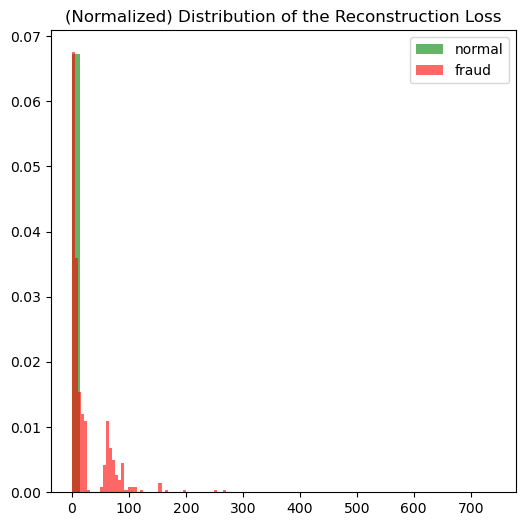

In [13]:
normal = mse[df_test_labels==0]
fraud = mse[df_test_labels==1]

fig, ax = plt.subplots(figsize=(6,6))

ax.hist(normal, bins=50, density=True, label="normal", alpha=.6, color="green")
ax.hist(fraud, bins=50, density=True, label="fraud", alpha=.6, color="red")

plt.title("(Normalized) Distribution of the Reconstruction Loss")
plt.legend()
plt.show()

In [35]:
THRESHOLD = 16

def mad_score(points):
    m = np.median(points)
    ad = np.abs(points - m)
    mad = np.median(ad)
    
    return ad / mad

z_scores = mad_score(mse)
outliers = z_scores > THRESHOLD


print(f"Detected {np.sum(outliers):,} outliers in a total of {np.size(z_scores):,} transactions [{np.sum(outliers)/np.size(z_scores):.2%}].")

Detected 1,523 outliers in a total of 57,355 transactions [2.66%].


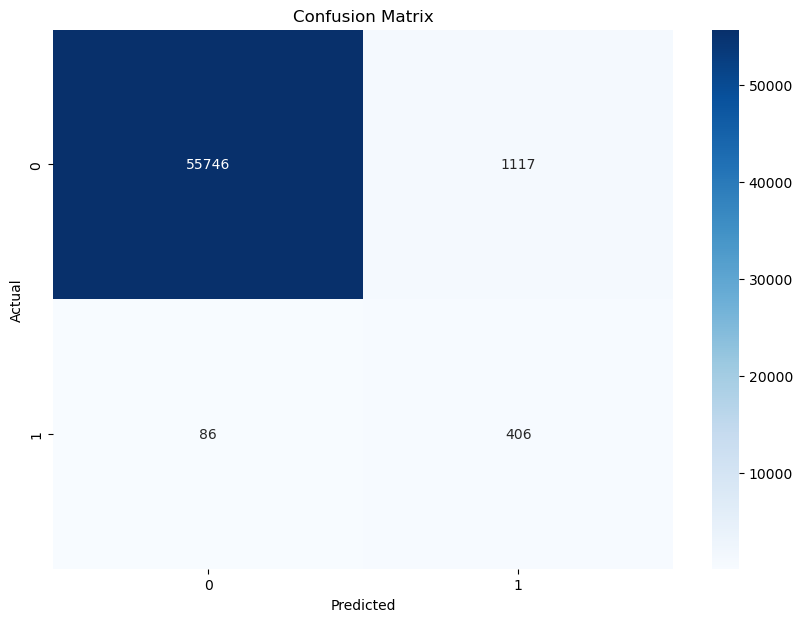

In [36]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
import seaborn as sns

# get (mis)classification
cm = confusion_matrix(df_test_labels, outliers)

# true/false positives/negatives
# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Autoencoder')
plt.show()